In [6]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime as dt
import warnings
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import json
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [7]:
#dataset
df=pd.read_excel(r"C:\Users\Acer\Desktop\Python-V\Industrial_Copper_Modelling\Copper_Set.xlsx")
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [8]:
data=df.copy(True)
data.T

,0,1,2,3,4,5,6,7,8,9,...,181663,181664,181665,181666,181667,181668,181669,181670,181671,181672
id,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,E140FF1B-2407-4C02-A0DD-780A093B1158,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,4E1C4E78-152B-430A-8094-ADD889C9D0AD,FE372230-29B1-4A29-BB73-CB9D3078C286,E1B47219-42C8-411D-AE46-AD5256DC4757,AA3F18A2-A7D6-43DE-8644-F0632AE2CB68,2851F48B-DA32-4DF3-884B-17A3100DD65A,6E4D638C-A820-4A40-836F-C9D48BC65528,...,08F8F1D6-0DAC-42B5-BA8A-B6C99EF1700B,A33557CD-93EF-4828-8235-E0A576C1A925,F9B79E56-2EBF-417B-9802-7F575D1079F7,C01DE4E8-BC5F-42AD-B35F-8FCBEE34C6ED,0B812591-B501-4F34-859A-B06381FAEB44,DE633116-D1DF-4846-982E-55EFC3658A76,A48374B1-E6DB-45F2-889A-1F9C27C099EB,91643238-5C7B-4237-9A5F-63AE3D35F320,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,AD0CA853-AE3C-4B2F-9FBB-8B0B965F84BC
item_date,20210401.0,20210401.0,20210401.0,20210401.0,20210401.0,20210401.0,20210401.0,20210401.0,20210401.0,20210401.0,...,20200702.0,20200702.0,20200702.0,20200702.0,20200702.0,20200702.0,20200702.0,20200702.0,20200702.0,20200702.0
quantity tons,54.151139,768.024839,386.127949,202.411065,785.526262,225.790676,3.522613,113.387124,69.071853,630.626917,...,1203.157826,603.11494,6.169226,82.123794,106.783299,102.482422,208.086469,4.235594,-2000,406.686538
customer,30156308.0,30202938.0,30153963.0,30349574.0,30211560.0,30202938.0,30209509.0,30342192.0,30341428.0,30202938.0,...,30200854.0,30200854.0,30200854.0,30200854.0,30200854.0,30200854.0,30200854.0,30200854.0,30200854.0,30200854.0
country,28.0,25.0,30.0,32.0,28.0,25.0,30.0,32.0,38.0,25.0,...,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0
status,Won,Won,Won,Won,Won,Won,Draft,Won,Won,Won,...,Won,Won,Won,Won,Won,Won,Won,Won,Won,Won
item type,W,W,WI,S,W,W,W,W,S,W,...,W,W,W,W,W,W,W,W,W,W
application,10.0,41.0,28.0,59.0,10.0,41.0,41.0,41.0,10.0,41.0,...,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0
thickness,2.0,0.8,0.38,2.3,4.0,1.5,0.38,0.68,0.6,1.5,...,0.72,0.85,0.71,1.18,0.96,0.96,0.95,0.71,0.85,0.71
width,1500.0,1210.0,952.0,1317.0,2000.0,1265.0,1125.0,1220.0,1275.0,1165.0,...,1240.0,1240.0,1300.0,1220.0,1240.0,1220.0,1500.0,1250.0,1250.0,1240.0


In [9]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [10]:
data.isna().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [11]:
for i in list(data.columns):
    print(f"{i}  \t:{data[i].nunique()}")

id  	:181671
item_date  	:252
quantity tons  	:181673
customer  	:1169
country  	:17
status  	:9
item type  	:7
application  	:30
thickness  	:594
width  	:1386
material_ref  	:16563
product_ref  	:33
delivery date  	:28
selling_price  	:9795


In [12]:
data[data["id"].isna()==True]['id']

26        NaN
104566    NaN
Name: id, dtype: object

In [13]:
data.iloc[26]

id                          NaN
item_date            20210401.0
quantity tons          15.92799
customer             30271717.0
country                    28.0
status           To be approved
item type                     W
application                10.0
thickness                   0.8
width                    1000.0
material_ref                NaN
product_ref              611993
delivery date        20210701.0
selling_price            1208.0
Name: 26, dtype: object

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181672.0,2.020459e+07,4.551119e+03,19950000.00,20200929.0,20201130.0,2.021020e+07,2.021040e+07
customer,181672.0,3.051221e+07,2.433382e+07,12458.00,30196884.0,30205242.0,3.028042e+07,2.147484e+09
country,181645.0,4.489302e+01,2.440421e+01,25.00,26.0,30.0,7.800000e+01,1.130000e+02
application,181649.0,2.561581e+01,1.775417e+01,2.00,10.0,15.0,4.100000e+01,9.900000e+01
thickness,181672.0,2.564827e+00,6.572321e+00,0.18,0.7,1.5,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00,1180.0,1250.0,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00,611993.0,640665.0,1.332077e+09,1.722208e+09
delivery date,181672.0,2.020738e+07,2.411059e+04,20190401.00,20201101.0,20210101.0,2.021040e+07,3.031010e+07
selling_price,181672.0,1.918036e+03,3.317956e+05,-1160.00,669.0,812.0,9.530000e+02,1.000010e+08


In [15]:
#PRE-PROCESSING CONVERTING DATE TIME FORMAT
columns_to_convert_datetime = ['item_date', 'delivery date']
for i in columns_to_convert_datetime:
    data[i] = pd.to_datetime(data[i], format='%Y%m%d', errors='coerce').dt.date
data.head(2)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,0000000000000000000000000000000000104991,1668701718,2021-04-01,1047.0


In [16]:
data.dtypes

id                object
item_date         object
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date     object
selling_price    float64
dtype: object

In [17]:
data['item_date'] = pd.to_datetime(data['item_date'], format='%Y-%m-%d')
data['delivery date']=pd.to_datetime(data['delivery date'],format='%Y-%m-%d')
data.head(2)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,0000000000000000000000000000000000104991,1668701718,2021-04-01,1047.0


In [18]:
print(data['item_date'].max())
print(data['item_date'].min())

2021-04-01 00:00:00
2020-07-02 00:00:00


In [19]:
print(data["delivery date"].max())
print(data['delivery date'].min())

2022-01-01 00:00:00
2019-04-01 00:00:00


In [20]:
data.dtypes

id                       object
item_date        datetime64[ns]
quantity tons            object
customer                float64
country                 float64
status                   object
item type                object
application             float64
thickness               float64
width                   float64
material_ref             object
product_ref               int64
delivery date    datetime64[ns]
selling_price           float64
dtype: object

In [21]:
#CONVERTING NUMERIC VALUES


In [22]:
columns_to_convert_numeric = ["quantity tons", "customer","country", "application", "thickness", "width", "selling_price"]
for i in columns_to_convert_numeric:
  data[i]=pd.to_numeric(data[i],errors='coerce')
data.head(2)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,0000000000000000000000000000000000104991,1668701718,2021-04-01,1047.0


In [23]:
data.isna().sum()

id                   2
item_date            3
quantity tons        1
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        3
selling_price        1
dtype: int64

In [24]:
#DROP ID COLUMN
data.drop(columns=['id'],inplace=True)
data.head(2)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.0
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,0000000000000000000000000000000000104991,1668701718,2021-04-01,1047.0


In [25]:
#MATERIAL_REF COLUMN
data['material_ref'] = data['material_ref'].apply(lambda x: np.nan if str(x).startswith('00000') else x)
data.head(3)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,NaN,1668701718,2021-04-01,1047.00
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33


In [26]:
data.drop(columns=['material_ref'],inplace=True)
data.head(2)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,1670798778,2021-07-01,854.0
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,1668701718,2021-04-01,1047.0


In [27]:
data.isna().sum()

item_date         3
quantity tons     1
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
product_ref       0
delivery date     3
selling_price     1
dtype: int64

In [28]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
item_date,181670,2020-11-26 22:56:58.127374080,2020-07-02 00:00:00,2020-09-29 00:00:00,2020-11-30 00:00:00,2021-02-03 00:00:00,2021-04-01 00:00:00,NaN
quantity tons,181672.0,5874.925754,-2000.0,10.970298,30.364635,67.160612,1000000000.0,2349081.241674
customer,181672.0,30512209.027968,12458.0,30196884.0,30205242.0,30280416.0,2147483647.0,24333815.584025
country,181645.0,44.893022,25.0,26.0,30.0,78.0,113.0,24.404214
application,181649.0,25.615809,2.0,10.0,15.0,41.0,99.0,17.754175
thickness,181672.0,2.564827,0.18,0.7,1.5,3.0,2500.0,6.572321
width,181673.0,1295.286724,1.0,1180.0,1250.0,1500.0,2990.0,261.631754
product_ref,181673.0,473967910.724318,611728.0,611993.0,640665.0,1332077137.0,1722207579.0,717510064.710402
delivery date,181670,2021-01-25 22:44:26.223372032,2019-04-01 00:00:00,2020-11-01 00:00:00,2021-01-01 00:00:00,2021-04-01 00:00:00,2022-01-01 00:00:00,NaN
selling_price,181672.0,1918.035505,-1160.0,669.0,812.0,953.0,100001015.0,331795.642555


In [29]:
#CHANGE THE NEGATIVE VALUES IN THE COLUMNS
data['quantity tons'] = data['quantity tons'].apply(lambda x: np.nan if x<=0 else x)
data['selling_price'] = data['selling_price'].apply(lambda x: np.nan if x<=0 else x)
data.describe().T

,count,mean,min,25%,50%,75%,max,std
item_date,181670,2020-11-26 22:56:58.127374080,2020-07-02 00:00:00,2020-09-29 00:00:00,2020-11-30 00:00:00,2021-02-03 00:00:00,2021-04-01 00:00:00,NaN
quantity tons,181668.0,5875.066247,0.00001,10.971217,30.365013,67.161335,1000000000.0,2349107.102735
customer,181672.0,30512209.027968,12458.0,30196884.0,30205242.0,30280416.0,2147483647.0,24333815.584025
country,181645.0,44.893022,25.0,26.0,30.0,78.0,113.0,24.404214
application,181649.0,25.615809,2.0,10.0,15.0,41.0,99.0,17.754175
thickness,181672.0,2.564827,0.18,0.7,1.5,3.0,2500.0,6.572321
width,181673.0,1295.286724,1.0,1180.0,1250.0,1500.0,2990.0,261.631754
product_ref,181673.0,473967910.724318,611728.0,611993.0,640665.0,1332077137.0,1722207579.0,717510064.710402
delivery date,181670,2021-01-25 22:44:26.223372032,2019-04-01 00:00:00,2020-11-01 00:00:00,2021-01-01 00:00:00,2021-04-01 00:00:00,2022-01-01 00:00:00,NaN
selling_price,181665.0,1918.124252,0.1,669.0,812.0,953.0,100001015.0,331802.034663


In [30]:
columns_fill_mean = ["quantity tons" , "thickness", "width", "selling_price"]
column_means = data[columns_fill_mean].mean()
data[columns_fill_mean] = data[columns_fill_mean].fillna(column_means)

In [31]:
#numerical datatype using median
data['quantity tons'].fillna(data['quantity tons'].median(), inplace=True)
data['customer'].fillna(data['customer'].median(), inplace=True)
data['country'].fillna(data['country'].median(), inplace=True)
data['application'].fillna(data['application'].median(), inplace=True)
data['thickness'].fillna(data['thickness'].median(), inplace=True)
data['selling_price'].fillna(data['selling_price'].median(), inplace=True)

In [32]:
#WITH MODE
columns_fill_mode = ['item_date', 'status', 'delivery date']
columns_modes = data[columns_fill_mode].mode().iloc[0]
data[columns_fill_mode] = data[columns_fill_mode].fillna(columns_modes)

In [33]:
# object datatype using mode
data['item_date'].fillna(data['item_date'].mode().iloc[0], inplace=True)
data['status'].fillna(data['status'].mode().iloc[0], inplace=True)
data['delivery date'].fillna(data['delivery date'].mode().iloc[0], inplace=True)

In [34]:
data["country"]=data["country"].astype('int64')

In [35]:
data.isna().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [36]:
data.dtypes

item_date        datetime64[ns]
quantity tons           float64
customer                float64
country                   int64
status                   object
item type                object
application             float64
thickness               float64
width                   float64
product_ref               int64
delivery date    datetime64[ns]
selling_price           float64
dtype: object

In [37]:
data.to_csv('clean_copper_data.csv',index=False)

In [38]:
#EDA
#TO VISUALIZE OUTLIERS AND SKEWNESS

# BEFORE TREATING

eda_data=data.copy(True)

In [39]:
#columns_to_convert_datetime = ['item_date', 'delivery date']
#for i in columns_to_convert_datetime:
    #eda_data[i] = pd.to_datetime(data[i], format='%Y%m%d', errors='coerce').dt.date
#data.head(2)

In [40]:
eda_data.dtypes

item_date        datetime64[ns]
quantity tons           float64
customer                float64
country                   int64
status                   object
item type                object
application             float64
thickness               float64
width                   float64
product_ref               int64
delivery date    datetime64[ns]
selling_price           float64
dtype: object

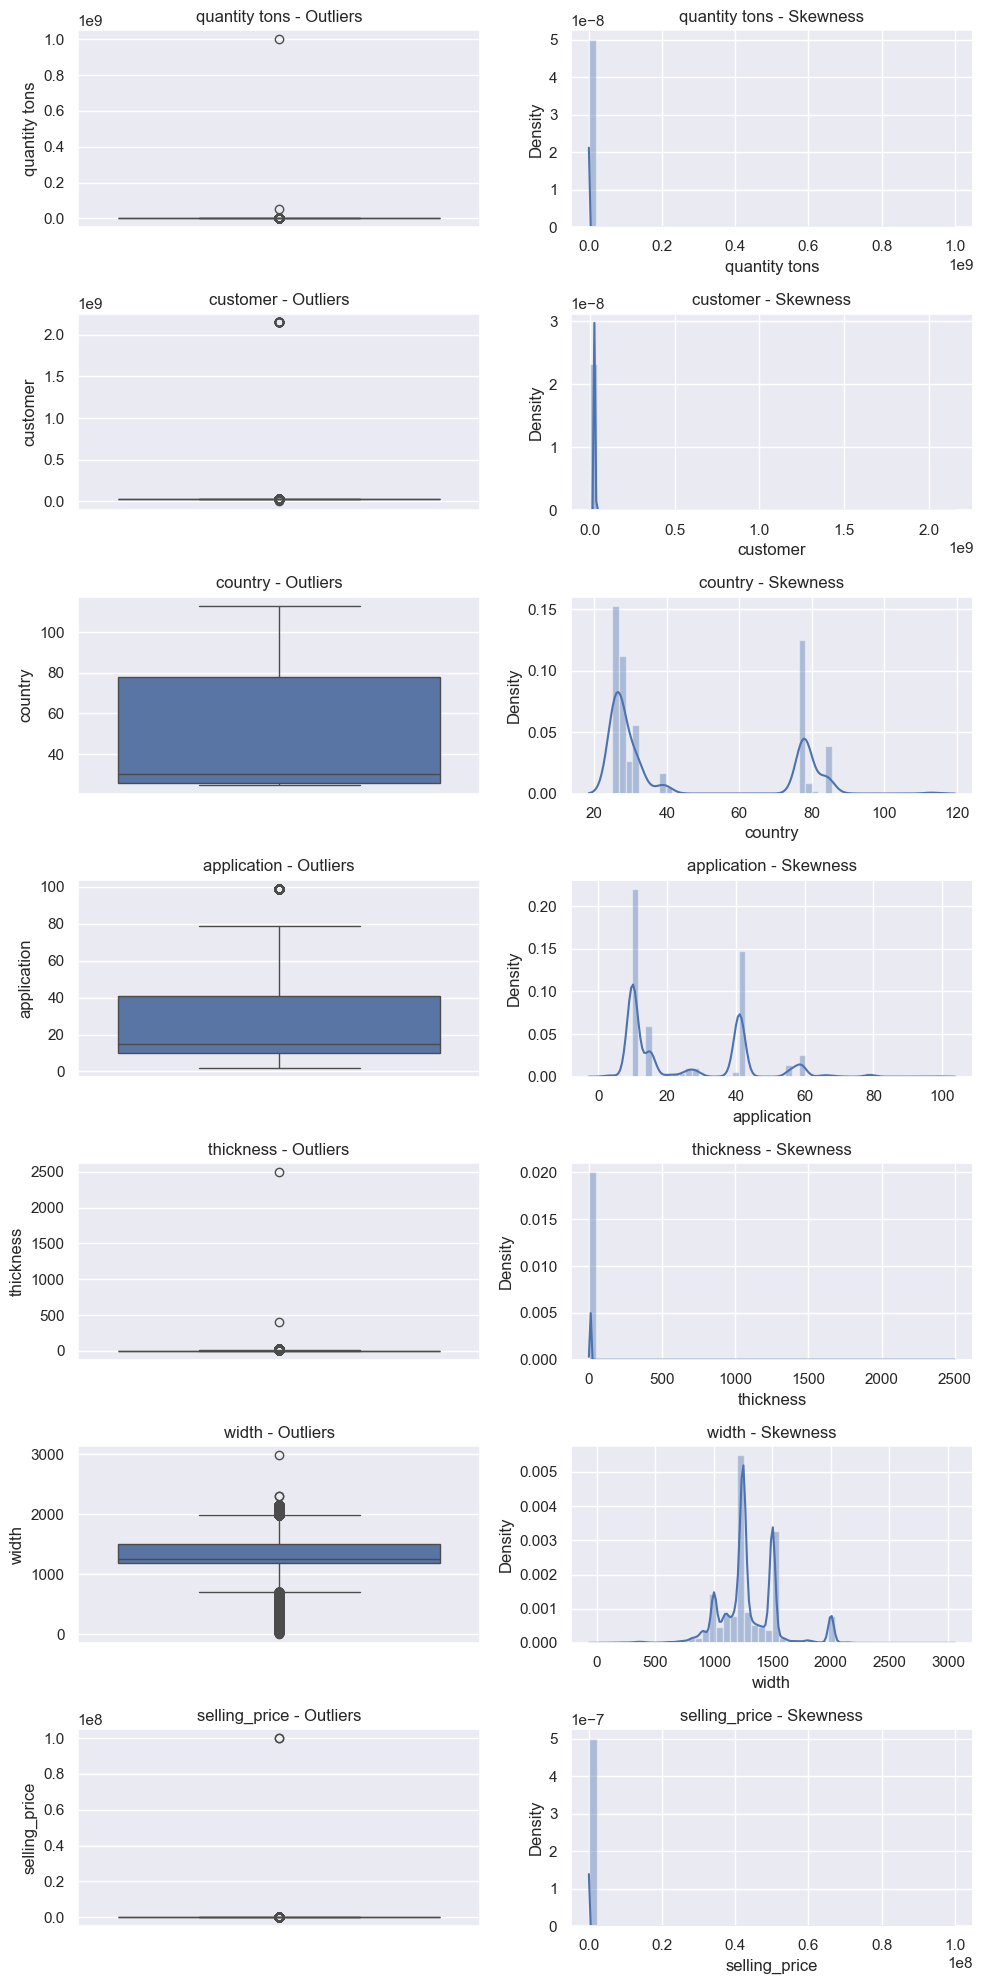

In [41]:
#Using Boxplot and Distplot
# Create a figure with 6 subplots
fig, axes = plt.subplots(7, 2, figsize=(10,20))

sns.boxplot(ax=axes[0, 0], data=eda_data['quantity tons'])      #quantity tons
axes[0, 0].set_title('quantity tons - Outliers')
sns.distplot(ax=axes[0, 1], a=eda_data['quantity tons'])
axes[0, 1].set_title('quantity tons - Skewness')

sns.boxplot(ax=axes[1, 0], data=eda_data['customer'])          #customer
axes[1, 0].set_title('customer - Outliers')
sns.distplot(ax=axes[1, 1], a=eda_data['customer'])
axes[1, 1].set_title('customer - Skewness')

sns.boxplot(ax=axes[2, 0], data=eda_data['country'])           #country
axes[2, 0].set_title('country - Outliers')
sns.distplot(ax=axes[2, 1], a=eda_data['country'])
axes[2, 1].set_title('country - Skewness')

sns.boxplot(ax=axes[3, 0], data=eda_data['application'])       #application
axes[3, 0].set_title('application - Outliers')
sns.distplot(ax=axes[3, 1], a=eda_data['application'])
axes[3, 1].set_title('application - Skewness')

sns.boxplot(ax=axes[4, 0], data=eda_data['thickness'])        #thickness
axes[4, 0].set_title('thickness - Outliers')
sns.distplot(ax=axes[4, 1], a=eda_data['thickness'])
axes[4, 1].set_title('thickness - Skewness')

sns.boxplot(ax=axes[5, 0], data=eda_data['width'])            #width
axes[5, 0].set_title('width - Outliers')
sns.distplot(ax=axes[5, 1], a=eda_data['width'])
axes[5, 1].set_title('width - Skewness')

sns.boxplot(ax=axes[6, 0], data=eda_data['selling_price'])   #selling_price
axes[6, 0].set_title('selling_price - Outliers')
sns.distplot(ax=axes[6, 1], a=eda_data['selling_price'])
axes[6, 1].set_title('selling_price - Skewness')

plt.tight_layout()
plt.show()

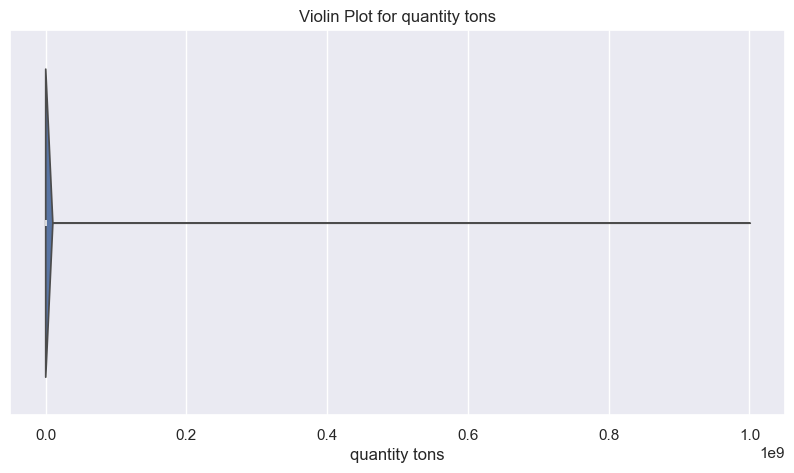

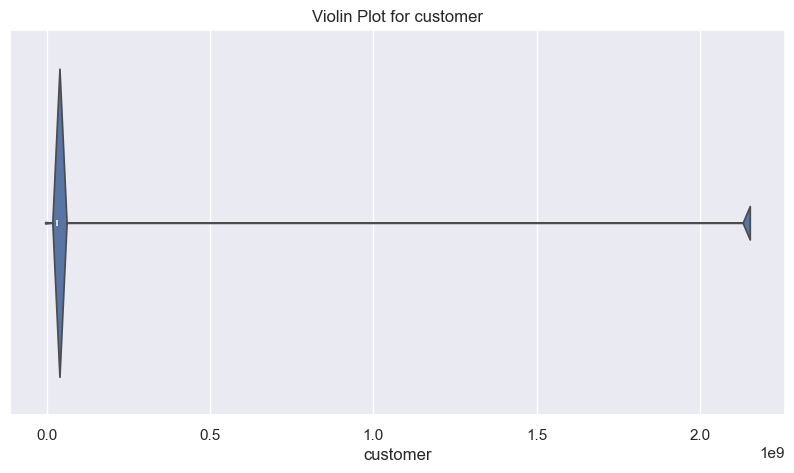

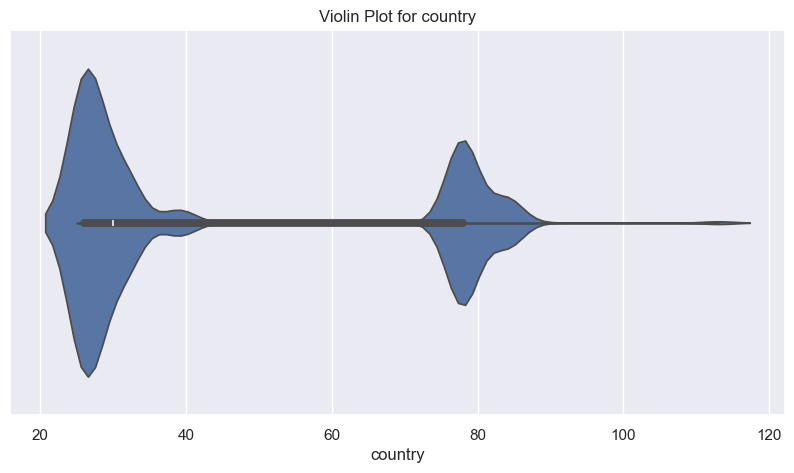

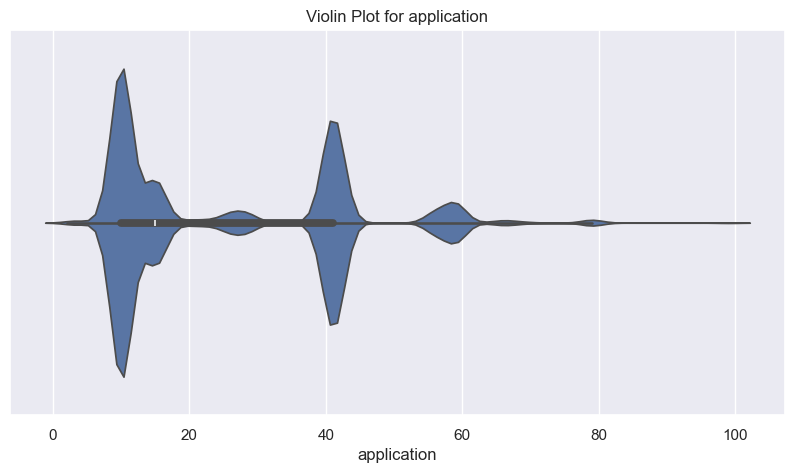

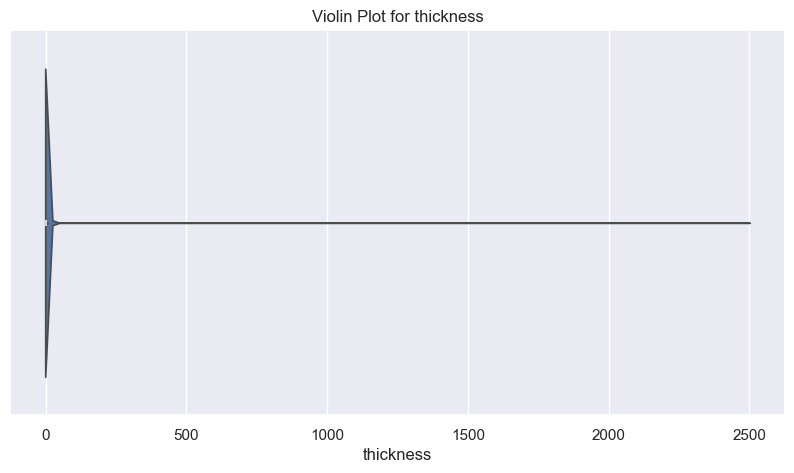

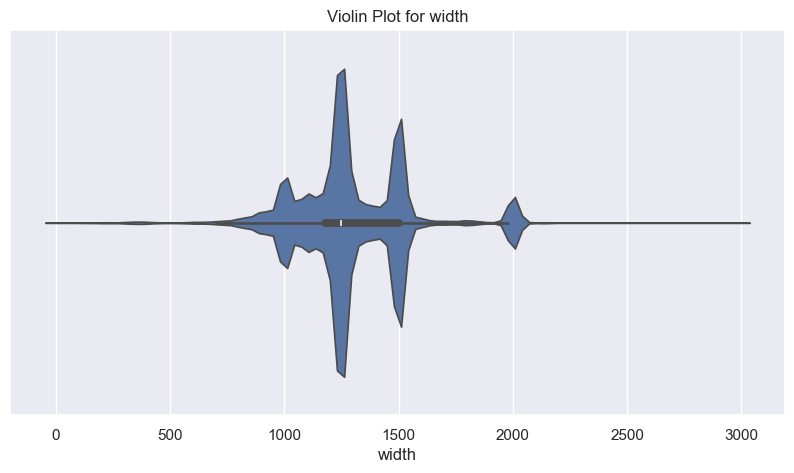

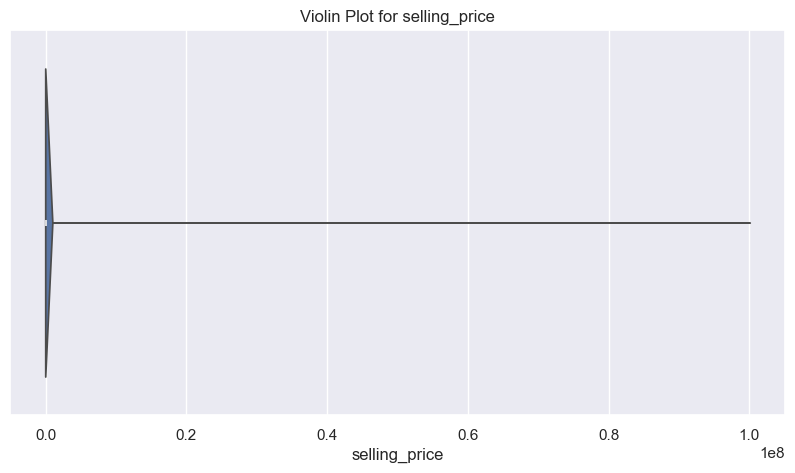

In [42]:
def plot(eda_data, column):
    plt.figure(figsize=(10,5))
    plt.subplot(1,1,1)
    sns.violinplot(data=eda_data, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()
for i in ['quantity tons', 'customer', 'country',  'application', 'thickness', 'width', 'selling_price']:
    plot(eda_data, i)

In [43]:
out_skew_data=eda_data.copy(True)

In [44]:
skewed_columns = ['quantity tons', 'thickness', 'width', 'selling_price']
for column in skewed_columns:
    neg = (out_skew_data[column] <= 0)
    print(f'{column} : {neg.sum()} ')
    out_skew_data.loc[neg,column] = np.nan

quantity tons : 0 
thickness : 0 
width : 0 
selling_price : 0 


In [45]:
columns_to_convert_datetime = ['item_date', 'delivery date']
for i in columns_to_convert_datetime:
    eda_data[i] = pd.to_datetime(data[i], format='%Y%m%d', errors='coerce').dt.date
data.head(2)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28,Won,W,10.0,2.0,1500.0,1670798778,2021-07-01,854.0
1,2021-04-01,768.024839,30202938.0,25,Won,W,41.0,0.8,1210.0,1668701718,2021-04-01,1047.0


In [46]:
out_skew_data.isna().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [47]:
out_skew_data.dropna(inplace=True)

In [48]:
out_skew_data.isna().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [49]:

out_skew_data_1=out_skew_data.copy(True)

In [50]:
out_skew_data_1=out_skew_data_1.drop(['item_date','delivery date','status','item type'],axis=1)
out_skew_data_2=out_skew_data_1.copy(True)

In [51]:

out_skew_data_1.skew()

quantity tons    424.690816
customer          86.985308
country            0.753835
application        0.724564
thickness        303.447634
width              0.374597
product_ref        1.015216
selling_price    301.388088
dtype: float64

In [52]:
print(out_skew_data['item_date'].max())
print(out_skew_data['item_date'].min())
print(out_skew_data["delivery date"].max())
print(out_skew_data['delivery date'].min())

2021-04-01 00:00:00
2020-07-02 00:00:00
2022-01-01 00:00:00
2019-04-01 00:00:00


In [53]:
#IQR-Inter Quartile Range
outlier_columns = ['quantity tons', 'thickness', 'width', 'selling_price']
before_stats = out_skew_data[outlier_columns].describe()

# Iterate over outlier columns and remove outliers
for column in outlier_columns:
    Q1 = out_skew_data[column].quantile(0.25)
    Q3 = out_skew_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    out_skew_data[column] = out_skew_data[column].clip(lower_bound, upper_bound)

# Calculate summary statistics after removing outliers
after_stats = out_skew_data[outlier_columns].describe()

# Compare the statistics before and after outlier removal
print("Summary statistics before removing outliers:")
print(before_stats)
print("\nSummary statistics after removing outliers:")
print(after_stats)

Summary statistics before removing outliers:
       quantity tons      thickness          width  selling_price
count   1.816730e+05  181673.000000  181673.000000   1.816730e+05
mean    5.875066e+03       2.564827    1295.286724   1.918124e+03
std     2.349075e+06       6.572303     261.631754   3.317947e+05
min     1.000000e-05       0.180000       1.000000   1.000000e-01
25%     1.097167e+01       0.700000    1180.000000   6.690000e+02
50%     3.036556e+01       1.500000    1250.000000   8.120000e+02
75%     6.716871e+01       3.000000    1500.000000   9.530000e+02
max     1.000000e+09    2500.000000    2990.000000   1.000010e+08

Summary statistics after removing outliers:
       quantity tons      thickness          width  selling_price
count  181673.000000  181673.000000  181673.000000  181673.000000
mean       49.181338       2.245432    1297.045583     819.099342
std        47.999957       1.890707     248.961933     209.159520
min         0.000010       0.180000     700.000000  

<function matplotlib.pyplot.show(close=None, block=None)>

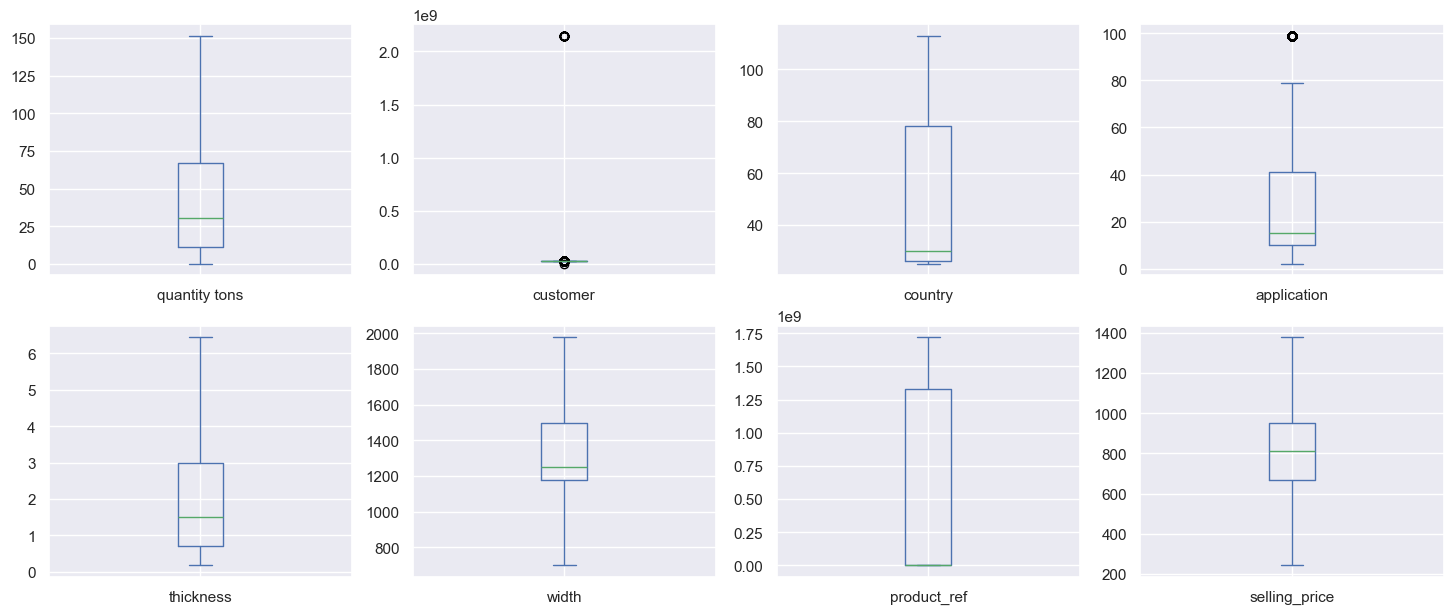

In [54]:
#AFTER TREATING OUTLIERS AND SKEWNESS
out_skew_data.plot(kind='box',subplots=True,layout=(4,4),figsize=(18,15))
plt.show

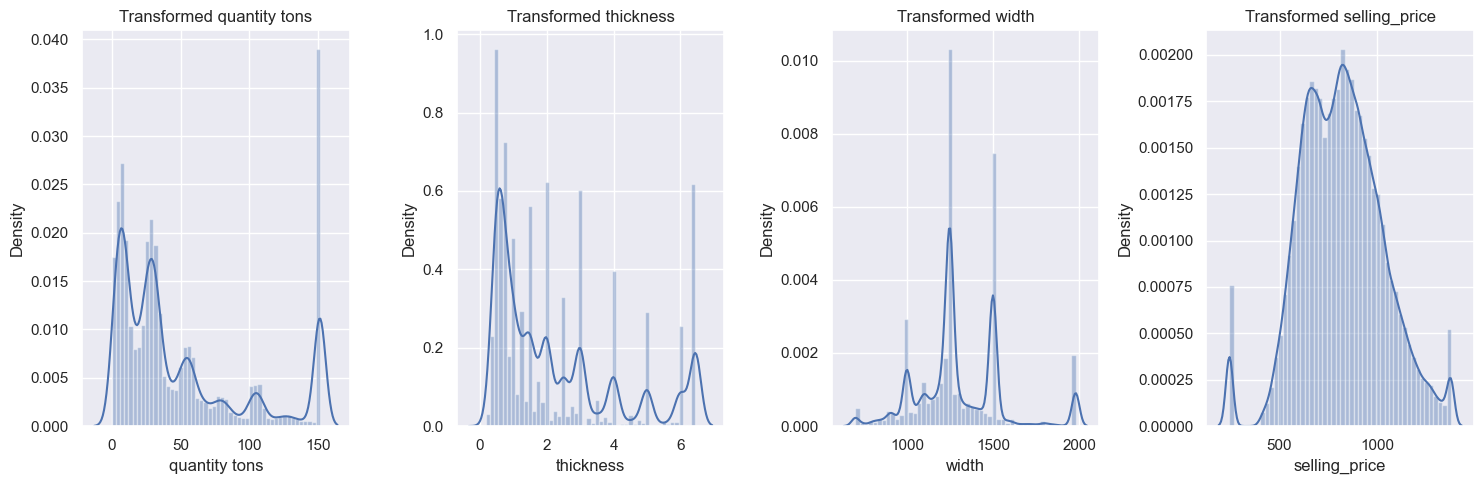

In [55]:
outlier_columns = ['quantity tons', 'thickness', 'width', 'selling_price']

# Plot the histograms of the transformed data
fig, axes = plt.subplots(1, 4,figsize=(15, 5))
axes = axes.flatten()
for i, column in enumerate(outlier_columns):
    sns.distplot(out_skew_data[column], kde=True, ax=axes[i])
    axes[i].set_title(f"Transformed {column}")

plt.tight_layout()
plt.show()

In [56]:
out_skew_data_1.skew()

quantity tons    424.690816
customer          86.985308
country            0.753835
application        0.724564
thickness        303.447634
width              0.374597
product_ref        1.015216
selling_price    301.388088
dtype: float64

In [57]:
# Here are some guidelines for interpreting skewness values:

# Skewness value close to 0: The distribution is approximately symmetrical.
# Skewness value between -0.5 and -1 or between 0.5 and 1: The distribution is moderately skewed.
# Skewness value less than -1 or greater than 1: The distribution is highly skewed.
#FEATURE ENGINEERING
#Lable encoding
#Feature selection
#Standardize / normalize data

In [58]:
model_data=out_skew_data.copy(True)
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   item_date      181673 non-null  datetime64[ns]
 1   quantity tons  181673 non-null  float64       
 2   customer       181673 non-null  float64       
 3   country        181673 non-null  int64         
 4   status         181673 non-null  object        
 5   item type      181673 non-null  object        
 6   application    181673 non-null  float64       
 7   thickness      181673 non-null  float64       
 8   width          181673 non-null  float64       
 9   product_ref    181673 non-null  int64         
 10  delivery date  181673 non-null  datetime64[ns]
 11  selling_price  181673 non-null  float64       
dtypes: datetime64[ns](2), float64(6), int64(2), object(2)
memory usage: 16.6+ MB


In [59]:
model_data['delivery_time_taken']=model_data['delivery date'].sub(model_data['item_date'],axis=0)
model_data.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,delivery_time_taken
0,2021-04-01,54.151139,30156308.0,28,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00,91 days
1,2021-04-01,151.464271,30202938.0,25,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00,0 days
2,2021-04-01,151.464271,30153963.0,30,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33,-90 days
3,2021-04-01,151.464271,30349574.0,32,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00,-90 days
4,2021-04-01,151.464271,30211560.0,28,Won,W,10.0,4.00,1980.0,640665,2021-03-01,577.00,-31 days


In [60]:
model_data['delivery_time_taken']=(model_data['item_date']-model_data['delivery date']).abs().dt.days
model_data.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,delivery_time_taken
0,2021-04-01,54.151139,30156308.0,28,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00,91
1,2021-04-01,151.464271,30202938.0,25,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00,0
2,2021-04-01,151.464271,30153963.0,30,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33,90
3,2021-04-01,151.464271,30349574.0,32,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00,90
4,2021-04-01,151.464271,30211560.0,28,Won,W,10.0,4.00,1980.0,640665,2021-03-01,577.00,31


In [61]:
x=model_data[['application','thickness','width','selling_price','quantity tons','country','customer','product_ref','delivery_time_taken']]

In [62]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   item_date            181673 non-null  datetime64[ns]
 1   quantity tons        181673 non-null  float64       
 2   customer             181673 non-null  float64       
 3   country              181673 non-null  int64         
 4   status               181673 non-null  object        
 5   item type            181673 non-null  object        
 6   application          181673 non-null  float64       
 7   thickness            181673 non-null  float64       
 8   width                181673 non-null  float64       
 9   product_ref          181673 non-null  int64         
 10  delivery date        181673 non-null  datetime64[ns]
 11  selling_price        181673 non-null  float64       
 12  delivery_time_taken  181673 non-null  int64         
dtypes: datetime64[

In [63]:
num=model_data.select_dtypes(include=np.number)
num

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price,delivery_time_taken
0,54.151139,30156308.0,28,10.0,2.00,1500.0,1670798778,854.00,91
1,151.464271,30202938.0,25,41.0,0.80,1210.0,1668701718,1047.00,0
2,151.464271,30153963.0,30,28.0,0.38,952.0,628377,644.33,90
3,151.464271,30349574.0,32,59.0,2.30,1317.0,1668701718,768.00,90
4,151.464271,30211560.0,28,10.0,4.00,1980.0,640665,577.00,31
...,...,...,...,...,...,...,...,...,...
181668,102.482422,30200854.0,25,41.0,0.96,1220.0,164141591,591.00,1
181669,151.464271,30200854.0,25,41.0,0.95,1500.0,164141591,589.00,1
181670,4.235594,30200854.0,25,41.0,0.71,1250.0,164141591,619.00,1
181671,151.464271,30200854.0,25,41.0,0.85,1250.0,164141591,601.00,1


In [64]:
#Correlation
# correlation matrix (ranges from 1 to -1)
corrm=num.corr()
#corrm.to_csv('corrm.csv')
corrm

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price,delivery_time_taken
quantity tons,1.000000,-0.001917,-0.090067,0.095524,0.002724,0.010390,0.051452,-0.041874,0.067614
customer,-0.001917,1.000000,-0.006669,-0.006869,0.021805,0.009585,-0.007716,-0.026028,-0.001515
country,-0.090067,-0.006669,1.000000,-0.019304,-0.056000,0.053867,-0.147326,-0.021731,-0.240407
application,0.095524,-0.006869,-0.019304,1.000000,-0.163478,-0.198878,-0.131784,0.129926,-0.167836
thickness,0.002724,0.021805,-0.056000,-0.163478,1.000000,0.419064,0.155789,-0.363750,0.084549
width,0.010390,0.009585,0.053867,-0.198878,0.419064,1.000000,-0.024106,-0.173308,0.038791
product_ref,0.051452,-0.007716,-0.147326,-0.131784,0.155789,-0.024106,1.000000,-0.077706,0.161776
selling_price,-0.041874,-0.026028,-0.021731,0.129926,-0.363750,-0.173308,-0.077706,1.000000,0.274175
delivery_time_taken,0.067614,-0.001515,-0.240407,-0.167836,0.084549,0.038791,0.161776,0.274175,1.000000


<Axes: >

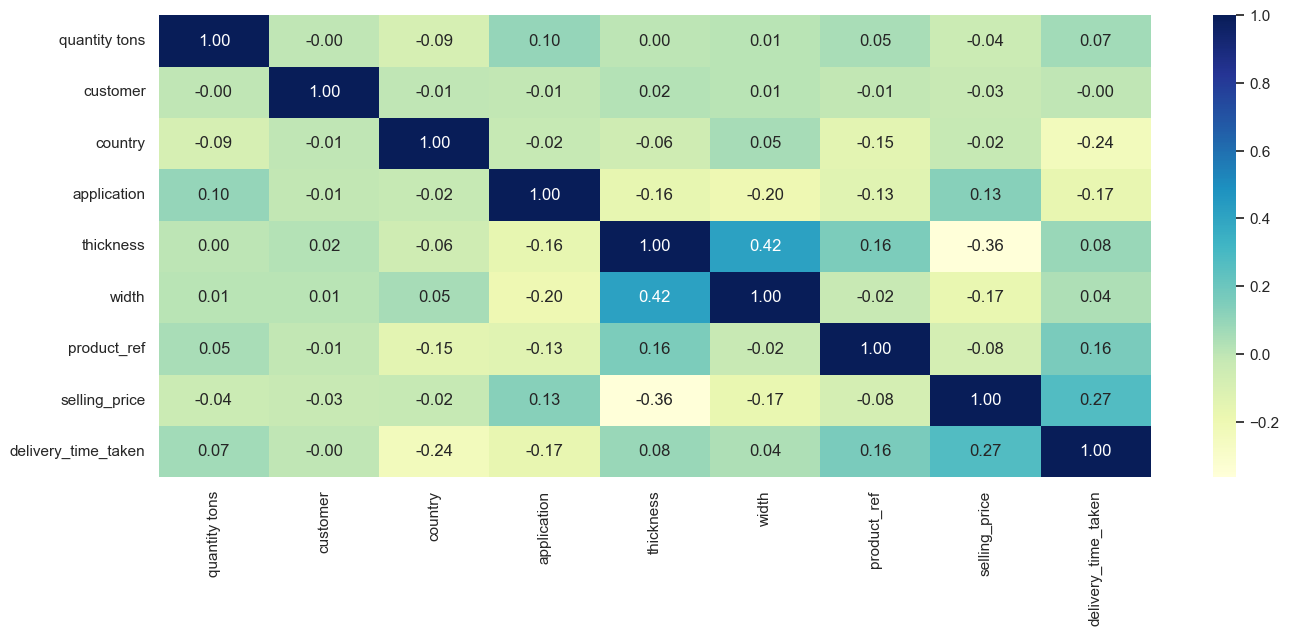

In [65]:
#Heatmap
# visualize correlation matrix in Seaborn using a heatmap
plt.figure(figsize=(16,6))
sns.heatmap(corrm,annot=True,cmap="YlGnBu",fmt=".2f")

In [66]:
#FINDING UNIQUE VALUE
model_data['country'] = model_data['country'].astype(str)
country=model_data['country'].unique()
status=model_data['status'].unique()
item=model_data['item type'].unique()
print(country)
print(status)
print(item)

['28' '25' '30' '32' '38' '78' '27' '77' '113' '79' '26' '39' '40' '84'
 '80' '107' '89']
['Won' 'Draft' 'To be approved' 'Lost' 'Not lost for AM' 'Wonderful'
 'Revised' 'Offered' 'Offerable']
['W' 'WI' 'S' 'Others' 'PL' 'IPL' 'SLAWR']


In [67]:
#ENCODE THE CATEGORICAL COLUMN
#country
from sklearn.preprocessing import OrdinalEncoder

encode=OrdinalEncoder()
model_data["country"] = encode.fit_transform(model_data[["country"]])
transformed_country=model_data["country"].unique()

transformed_country

array([ 5.,  2.,  6.,  7.,  8., 12.,  4., 11.,  1., 13.,  3.,  9., 10.,
       15., 14.,  0., 16.])

In [68]:
#status
encode=OrdinalEncoder()
model_data['status'] = encode.fit_transform(model_data[['status']])
transformed_status=model_data['status'].unique()

transformed_status

array([7., 0., 6., 1., 2., 8., 5., 4., 3.])

In [69]:
#item type
encode=OrdinalEncoder()
model_data["item type"] = encode.fit_transform(model_data[["item type"]])
transformed_item=model_data["item type"].unique()

transformed_item

array([5., 6., 3., 1., 2., 0., 4.])

In [70]:
model_data.head(3)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,delivery_time_taken
0,2021-04-01,54.151139,30156308.0,5.0,7.0,5.0,10.0,2.00,1500.0,1670798778,2021-07-01,854.00,91
1,2021-04-01,151.464271,30202938.0,2.0,7.0,5.0,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00,0
2,2021-04-01,151.464271,30153963.0,6.0,7.0,6.0,28.0,0.38,952.0,628377,2021-01-01,644.33,90


In [71]:
co=model_data.corr()
co

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,delivery_time_taken
item_date,1.000000,-0.004199,-0.003787,-0.017767,0.080484,0.077163,-0.008445,0.004441,0.005957,0.045250,0.920098,0.556552,0.438562
quantity tons,-0.004199,1.000000,-0.001917,-0.088901,-0.055851,-0.244962,0.095524,0.002724,0.010390,0.051452,0.016028,-0.041874,0.067614
customer,-0.003787,-0.001917,1.000000,-0.002373,-0.020449,-0.010901,-0.006869,0.021805,0.009585,-0.007716,-0.002908,-0.026028,-0.001515
country,-0.017767,-0.088901,-0.002373,1.000000,0.086433,0.152515,-0.045995,-0.043309,0.051926,-0.146454,-0.093006,-0.038023,-0.223455
status,0.080484,-0.055851,-0.020449,0.086433,1.000000,0.242838,0.132781,-0.127175,-0.092670,-0.069740,-0.054812,0.122181,-0.260809
item type,0.077163,-0.244962,-0.010901,0.152515,0.242838,1.000000,0.169124,-0.076782,-0.092094,-0.089501,0.005805,0.096087,-0.142579
application,-0.008445,0.095524,-0.006869,-0.045995,0.132781,0.169124,1.000000,-0.163478,-0.198878,-0.131784,-0.078509,0.129926,-0.167836
thickness,0.004441,0.002724,0.021805,-0.043309,-0.127175,-0.076782,-0.163478,1.000000,0.419064,0.155789,0.042498,-0.363750,0.084549
width,0.005957,0.010390,0.009585,0.051926,-0.092670,-0.092094,-0.198878,0.419064,1.000000,-0.024106,0.026823,-0.173308,0.038791
product_ref,0.045250,0.051452,-0.007716,-0.146454,-0.069740,-0.089501,-0.131784,0.155789,-0.024106,1.000000,0.096195,-0.077706,0.161776


In [72]:
#After encoding the Categorical data
for i, j in zip(status, transformed_status):
    print('After encoding :',i,'----- encoded :',j)

After encoding : Won ----- encoded : 7.0
After encoding : Draft ----- encoded : 0.0
After encoding : To be approved ----- encoded : 6.0
After encoding : Lost ----- encoded : 1.0
After encoding : Not lost for AM ----- encoded : 2.0
After encoding : Wonderful ----- encoded : 8.0
After encoding : Revised ----- encoded : 5.0
After encoding : Offered ----- encoded : 4.0
After encoding : Offerable ----- encoded : 3.0


In [73]:
for i,j in zip(item, transformed_item):
    print('After encoding :',i,'----- encoded :',j)

After encoding : W ----- encoded : 5.0
After encoding : WI ----- encoded : 6.0
After encoding : S ----- encoded : 3.0
After encoding : Others ----- encoded : 1.0
After encoding : PL ----- encoded : 2.0
After encoding : IPL ----- encoded : 0.0
After encoding : SLAWR ----- encoded : 4.0


In [74]:
for i,j in zip(country, transformed_country):
    print('After encoding :',i,'----- encoded :',j)

After encoding : 28 ----- encoded : 5.0
After encoding : 25 ----- encoded : 2.0
After encoding : 30 ----- encoded : 6.0
After encoding : 32 ----- encoded : 7.0
After encoding : 38 ----- encoded : 8.0
After encoding : 78 ----- encoded : 12.0
After encoding : 27 ----- encoded : 4.0
After encoding : 77 ----- encoded : 11.0
After encoding : 113 ----- encoded : 1.0
After encoding : 79 ----- encoded : 13.0
After encoding : 26 ----- encoded : 3.0
After encoding : 39 ----- encoded : 9.0
After encoding : 40 ----- encoded : 10.0
After encoding : 84 ----- encoded : 15.0
After encoding : 80 ----- encoded : 14.0
After encoding : 107 ----- encoded : 0.0
After encoding : 89 ----- encoded : 16.0


In [75]:
#Pickle
import pickle

file_path='country.pkl'
file_path2='status.pkl'
file_path3='item type.pkl'

with open(file_path, 'wb') as file:
    pickle.dump(transformed_country, file)
with open(file_path2, 'wb') as file:
    pickle.dump(transformed_status, file)
with open(file_path3, 'wb') as file:
    pickle.dump(transformed_item, file)

print(f'Pickle file created: {file_path}, {file_path2},{file_path3}')

Pickle file created: country.pkl, status.pkl,item type.pkl


In [76]:
#Load
import pickle
with open('status.pkl', 'rb') as file:
    encode_status = pickle.load(file)

encode_status

array([7., 0., 6., 1., 2., 8., 5., 4., 3.])

In [77]:
#REGRESSION MODEL FOR FINDING SELLING PRICE
category_col=['status', 'item type','country']
encoder= OrdinalEncoder()
for i in category_col:
    print(i)
    model_data[i] = encoder.fit_transform(model_data[[i]])
    print(model_data[i].unique())

status
[7. 0. 6. 1. 2. 8. 5. 4. 3.]
item type


[5. 6. 3. 1. 2. 0. 4.]
country
[ 5.  2.  6.  7.  8. 12.  4. 11.  1. 13.  3.  9. 10. 15. 14.  0. 16.]


In [78]:
model_data.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,delivery_time_taken
0,2021-04-01,54.151139,30156308.0,5.0,7.0,5.0,10.0,2.00,1500.0,1670798778,2021-07-01,854.00,91
1,2021-04-01,151.464271,30202938.0,2.0,7.0,5.0,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00,0
2,2021-04-01,151.464271,30153963.0,6.0,7.0,6.0,28.0,0.38,952.0,628377,2021-01-01,644.33,90
3,2021-04-01,151.464271,30349574.0,7.0,7.0,3.0,59.0,2.30,1317.0,1668701718,2021-01-01,768.00,90
4,2021-04-01,151.464271,30211560.0,5.0,7.0,5.0,10.0,4.00,1980.0,640665,2021-03-01,577.00,31


In [79]:
X = model_data[[ 'quantity tons','thickness','width','country','status','item type', 'application','product_ref','delivery_time_taken']].values
y = model_data[['selling_price']].values

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [80]:
import pickle
file_path6='scaling.pkl'
with open(file_path6, 'wb') as file:
    pickle.dump(scaler, file)
print(f'Pickle file created: {file_path6}')

Pickle file created: scaling.pkl


In [82]:
# Create an instance of each regression model
et_model = ExtraTreesRegressor()                   # Extra Tree Regressor
xgb_model = XGBRegressor()                         # Extreme Gradient Boost Regressor
dt_model = DecisionTreeRegressor()                 # Decision Tree Regressor

# Train the models
et_model.fit(X_train, y_train)
xgb_model.fit(X_train,y_train)
dt_model.fit(X_train, y_train)


# Make predictions on the test set
et_preds = et_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)
dt_preds = dt_model.predict(X_test)

# Evaluate the models

et_mse = mean_squared_error(y_test, et_preds)
et_mae = mean_absolute_error(y_test, et_preds)
et_r2 = r2_score(y_test, et_preds)

xgb_mse = mean_squared_error(y_test, xgb_preds)
xgb_mae = mean_absolute_error(y_test, xgb_preds)
xgb_r2 = r2_score(y_test, xgb_preds)

dt_mse = mean_squared_error(y_test, dt_preds)
dt_mae = mean_absolute_error(y_test, dt_preds)
dt_r2 = r2_score(y_test, dt_preds)

In [ ]:
print(f"ExtraTreeRegressor    MSE: {et_mse},  MAE: {et_mae},  R2: {et_r2}")
print(f"XGBRegressor          MSE: {xgb_mse},  MAE: {xgb_mae},  R2: {xgb_r2}")
print(f"DecisionTreeRegressor MSE: {dt_mse},  MAE: {dt_mae}, R2: {dt_r2}")

ExtraTreeRegressor    MSE: 4525.003453706419,  MAE: 41.11872170054703,  R2: 0.8966451251122648
XGBRegressor          MSE: 8371.821674510858,  MAE: 68.69477141985705,  R2: 0.8087805698705577
DecisionTreeRegressor MSE: 7898.556562889799,  MAE: 47.75366088855869, R2: 0.81959034203996


In [ ]:
models = ['ExtraTreeRegressor', 'DecisionTreeRegressor', 'XGBRegressor']
score = [et_r2, dt_r2, xgb_r2]

fig=px.bar(x=models, y=score,title='R_2 of Regression Models')
fig.show()

print("FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE\n")
max_score = max(score)  # Initialize max_score with the maximum value in the score list
max_model = ""

for model, score_value in zip(models, score):
    print(model, score_value)
    if score_value == max_score:
        max_model = model

print(f"\nModel: {max_model} contain Maximum R2_Score: {max_score} ")

FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE

ExtraTreeRegressor 0.8966451251122648
DecisionTreeRegressor 0.81959034203996
XGBRegressor 0.8087805698705577

Model: ExtraTreeRegressor contain Maximum R2_Score: 0.8966451251122648 


In [83]:
model=et_model.fit(X_train, y_train)

In [84]:
import pickle

file_path7='ExtraTreeRegressor.pkl'
with open(file_path7, 'wb') as file:
    pickle.dump(model, file)
print(f'Pickle file created: {file_path7}')

Pickle file created: ExtraTreeRegressor.pkl


In [85]:
with open('ExtraTreeRegressor.pkl', 'rb') as file:
    encode_status = pickle.load(file)

encode_status

ExtraTreesRegressor()

In [86]:
#CLASSIFICATION MODEL FOR PREDICT THE STATUS WON/LOST
X = model_data[[ 'quantity tons','thickness','width','selling_price','country','item type','application','product_ref','delivery_time_taken']].values
y = model_data[['status']].values

scaler_classify = StandardScaler().fit(X)
X = scaler_classify.transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [87]:
import pickle

file_path8='scaling_classify.pkl'
with open(file_path8, 'wb') as file:
    pickle.dump(scaler_classify, file)
print(f'Pickle file created: {file_path8}')

Pickle file created: scaling_classify.pkl


In [88]:
# Create an instance of each regression model
rf_model = RandomForestClassifier()                # Random Forest Classifier
xgb_cls_model = xgb.XGBClassifier()                # Extreme Gradient Classifier
dtc_model=DecisionTreeClassifier()                 # Decision Tree Classifier

# Train the models
rf_model.fit(X_train, y_train)
xgb_cls_model.fit(X_train, y_train)
dtc_model.fit(X_train,y_train)

# Make predictions on the test set
rf_preds = rf_model.predict(X_test)
xgb_cls_preds = xgb_cls_model.predict(X_test)
dtc_preds = dtc_model.predict(X_test)

# Evaluate the models
rf_accuracy = accuracy_score(y_test, rf_preds)
xgb_cls_accuracy = accuracy_score(y_test, xgb_cls_preds)
dtc_accuracy = accuracy_score(y_test, dtc_preds)

In [89]:
print(f"Random Forest Classifier Accuracy : {rf_accuracy}")
print(f"XGB Classifier Accuracy           : {xgb_cls_accuracy}")
print(f"Decision Tree Classifier Accuracy : {dtc_accuracy}")

Random Forest Classifier Accuracy : 0.9151407287805952
XGB Classifier Accuracy           : 0.83481340134307
Decision Tree Classifier Accuracy : 0.8792337895857033


In [90]:
models = ['RandomForestClassifier', 'XGBClassifier','DecisionTreeClassifier']
score = [rf_accuracy, xgb_cls_accuracy,dtc_accuracy]

fig=px.bar(x=models, y=score,title='Accuracy of Classification Models')
fig.show()

print("FINDING BEST FIT MODEL FOR EVALUATION BASED ON  ACCURACY\n")
max_score = max(score)  # Initialize max_score with the maximum value in the score list
max_model = ""

for model, score_value in zip(models, score):
    print(model, score_value)
    if score_value == max_score:
        max_model = model

print(f"\nModel: {max_model} contain Maximum accuracy: {max_score} ")

FINDING BEST FIT MODEL FOR EVALUATION BASED ON  ACCURACY

RandomForestClassifier 0.9151407287805952
XGBClassifier 0.83481340134307
DecisionTreeClassifier 0.8792337895857033

Model: RandomForestClassifier contain Maximum accuracy: 0.9151407287805952 


In [91]:
model_cls=rf_model.fit(X_train, y_train)

In [92]:
file_path9='RandomForestClassification.pkl'
with open(file_path9, 'wb') as file:
    pickle.dump(model_cls, file)
print(f'Pickle file created: {file_path9}')

Pickle file created: RandomForestClassification.pkl


In [93]:
with open('RandomForestClassification.pkl', 'rb') as file:
    encode_status = pickle.load(file)

encode_status

RandomForestClassifier()

In [ ]:
import numpy as np

try:
    # Gather user input
    quantity = float(input('Enter quantity: '))
    thickness = float(input('Enter thickness: '))
    width = float(input('Enter width: '))
    selling_price = float(input('Enter selling price: '))

    # Validate input values (example validation)
    if quantity <= 0 or thickness <= 0 or width <= 0 or selling_price <= 0:
        raise ValueError("Quantity, thickness, width, and selling price must be positive.")

    # Gather additional information
    new_sample_co = input("Enter a country: ")
    c = None
    for i, j in zip(country, transformed_country):
        if new_sample_co == i:
            c = j
            break
    else:
        print("Country not found.")
        exit()

    new_sample_it = input("Enter an item type: ")
    it = None
    for i, j in zip(item, transformed_item):
        if new_sample_it == i:
            it = j
            break
    else:
        print("Item type not found.")
        exit()

    # Transform and predict
    x = [quantity, thickness, width, selling_price, c, it, 10.0, 1670798778, 91]
    x = np.array(x).reshape(1, -1)  # Reshape to 2D array
    new_sample_scaled = scaler_classify.transform(x)
    new_pred = rf_model.predict(new_sample_scaled)

    # Output result
    if new_pred == 6:
        print('WON')
    else:
        print('LOST')

except ValueError as ve:
    print("Invalid input:", ve)
except Exception as e:
    print("An error occurred:", e)
